In [1]:
# 농수축 & 이미용 EDAddd
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
plt.style.use('ggplot') # 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 나눔고딕코드 폰트 설치 (필요한사람만 돌리세요)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic')

In [5]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/base_line.xlsx', header=0)
else:
    print('Not running on CoLab')
    df = pd.read_excel('c:/bc/base_line.xlsx', header=0)

Not running on CoLab


In [6]:
def group_df(group_name):
    return df[df.p_group == group_name]

def box_plot(group_name):
    times = ['MONTH','DAY_NUM','HOUR']
    features = ['total_price','sales','unit_price']
    nrows = ncols = 3  

    fig, axes = plt.subplots(nrows,ncols, figsize = (18,18))

    for row, time in enumerate(times):
        for col ,feature in enumerate(features):

            g = sns.boxplot(x=time, y=feature, data=group_df(group_name), ax=axes[row,col])

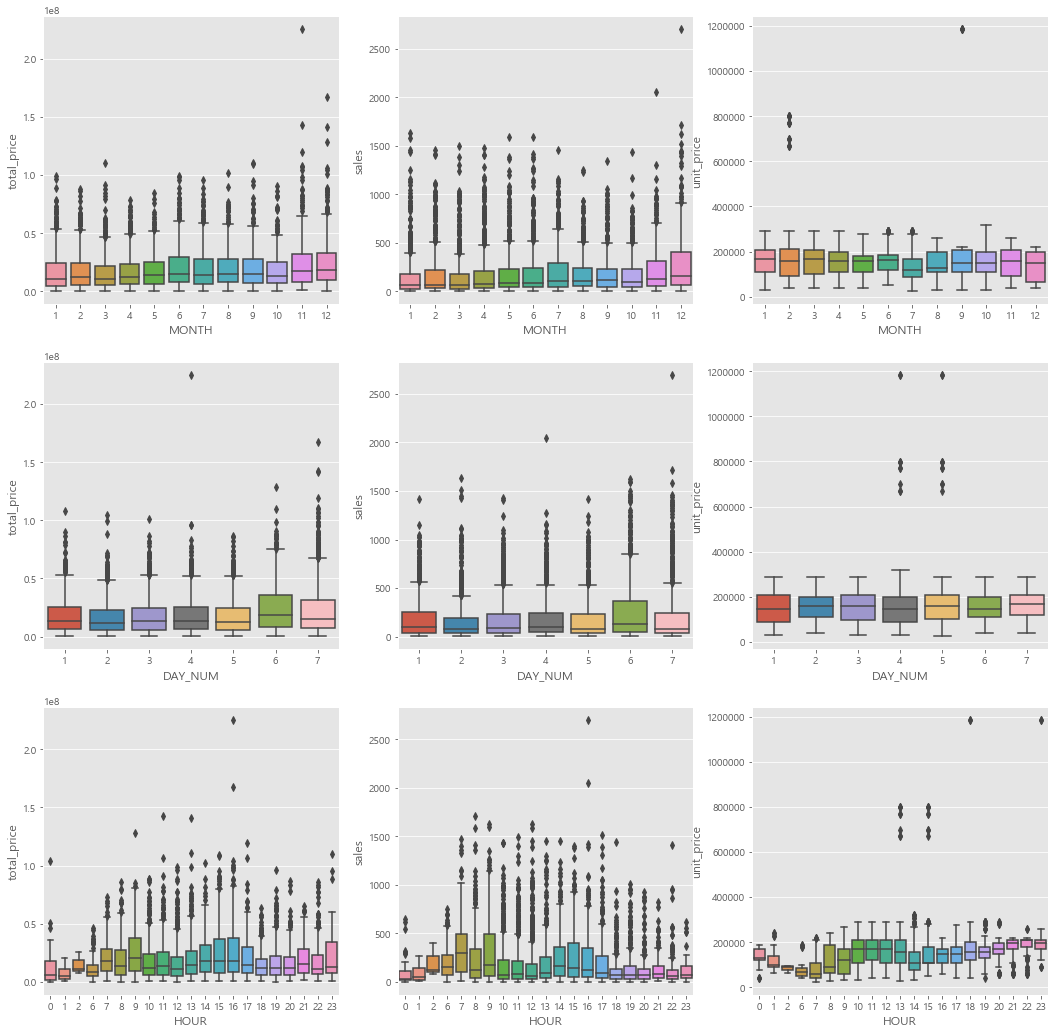

In [9]:
box_plot('주방')

In [30]:
def unit_box(group):
    f = plt.figure(figsize=(20,15))
    sns.boxplot(x='MONTH', y='unit_price', data=df[df['p_group'] == group])
    print(df[df['p_group'] == group].unit_price.describe())

count    2.769000e+03
mean     1.766035e+05
std      1.637418e+05
min      1.280000e+04
25%      6.980000e+04
50%      1.480000e+05
75%      2.180000e+05
max      1.980000e+06
Name: unit_price, dtype: float64


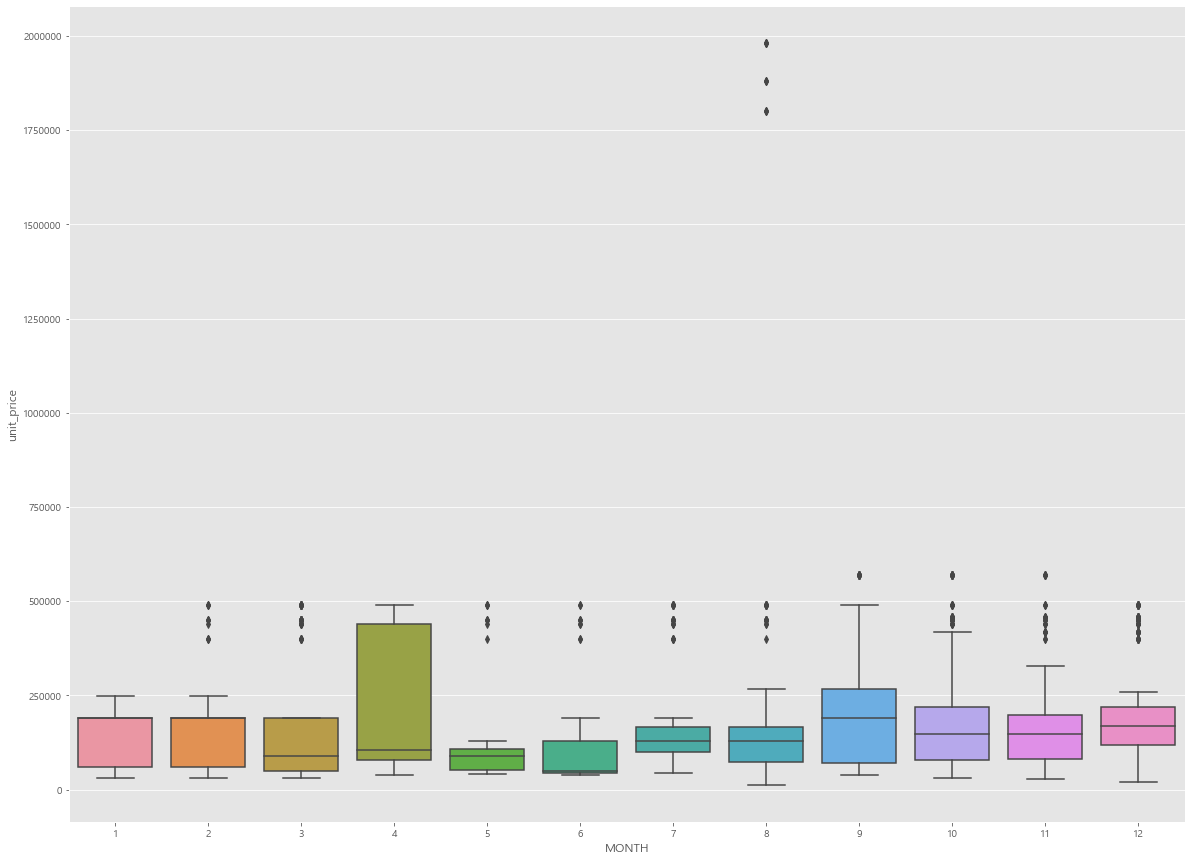

In [33]:
unit_box('생활용품')

In [ ]:
#상품군 별 월, 시간대, 요일별 방송 횟수 count
def monthly_time_weekday_broad_count(p_group_name):
    figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
    figure.set_size_inches(15,5)

    month = df[df.p_group==p_group_name].groupby('MONTH')['unit_price'].count()
    hour = df[df.p_group==p_group_name].groupby('HOUR')['unit_price'].count()
    day_name = df[df.p_group==p_group_name].groupby('DAY_NAME')['unit_price'].count()

    sns.barplot(x=month.index, y=month.values, ax=ax1)
    sns.barplot(x=hour.index, y=hour.values, ax=ax2)
    sns.barplot(x=day_name.index, y=day_name.values, ax=ax3)

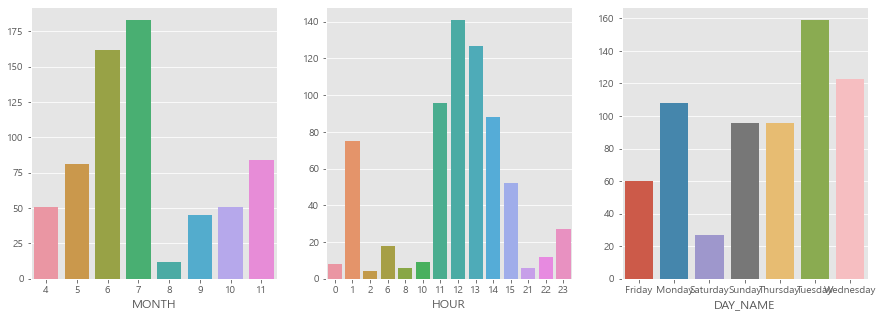

In [ ]:
monthly_time_weekday_broad_count('침구')

In [ ]:
# 특정 상품군의 월별 unit_price,total_price,sales(mean, sum)
def kinds_sum_mean(form,arg):
    figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2)
    figure.set_size_inches(20,10)

    m_data_sum = df[df['p_group'] == arg].groupby(form).sum()['unit_price']
    h_data_sum = df[df['p_group'] == arg].groupby(form).sum()['total_price']
    d_data_sum = df[df['p_group'] == arg].groupby(form).sum()['sales']

    m_data_mean = df[df['p_group'] == arg].groupby(form).mean()['unit_price']
    h_data_mean = df[df['p_group'] == arg].groupby(form).mean()['total_price']
    d_data_mean = df[df['p_group'] == arg].groupby(form).mean()['sales']

    sns.pointplot(x = m_data_sum.index, y = m_data_sum.values, ax = ax1)
    sns.pointplot(x = h_data_sum.index, y = h_data_sum.values, ax = ax3)
    sns.barplot(x = d_data_sum.index, y = d_data_sum.values, ax = ax5)
    
    sns.pointplot(x = m_data_mean.index, y = m_data_mean.values, ax = ax2)
    sns.pointplot(x = h_data_mean.index, y = h_data_mean.values, ax = ax4)
    sns.barplot(x = d_data_mean.index, y = d_data_mean.values, ax = ax6)
    
    ax1.set(title='sum')
    ax2.set(title='mean')

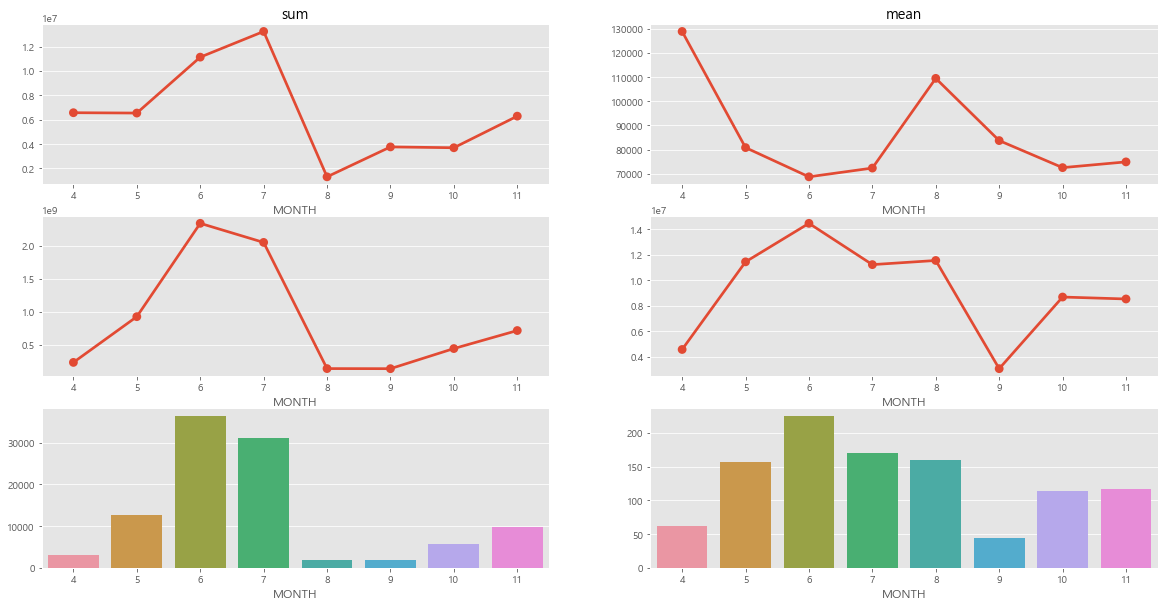

In [ ]:
kinds_sum_mean('MONTH','침구') # MONTH, HOUR, DAY_NAME중 선택

In [4]:
# 노출시간의 합 확인하기
def exp_min_sum(arg):
    figure, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,8))

    times = ['MONTH','HOUR','DAY_NAME']
    for index,time in enumerate(times):
      data = df[df['p_group'] == arg].groupby(time).sum()['exp_min']

      g = sns.barplot(x = data.index, y = data.values, ax = axes[index])

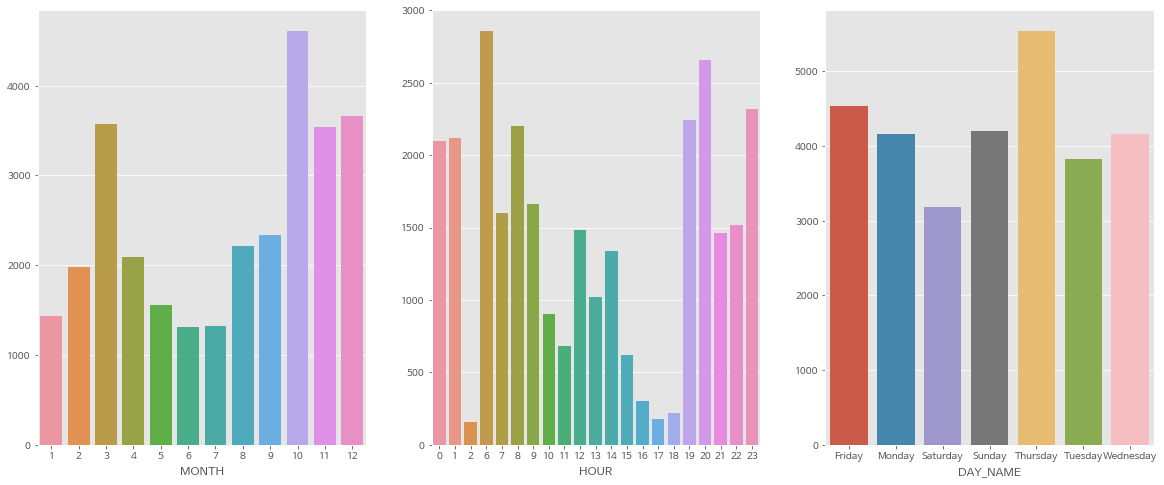

In [5]:
exp_min_sum('생활용품')

In [ ]:
# 월별 데이터 자르기

In [ ]:
month_name = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

data_list = []
for idx, mon in enumerate(month_name) : 
    globals()['{}_data'.format(mon)] = df[df['MONTH'] == idx+1]

[Text(0.5, 1.0, '12월 편성')]

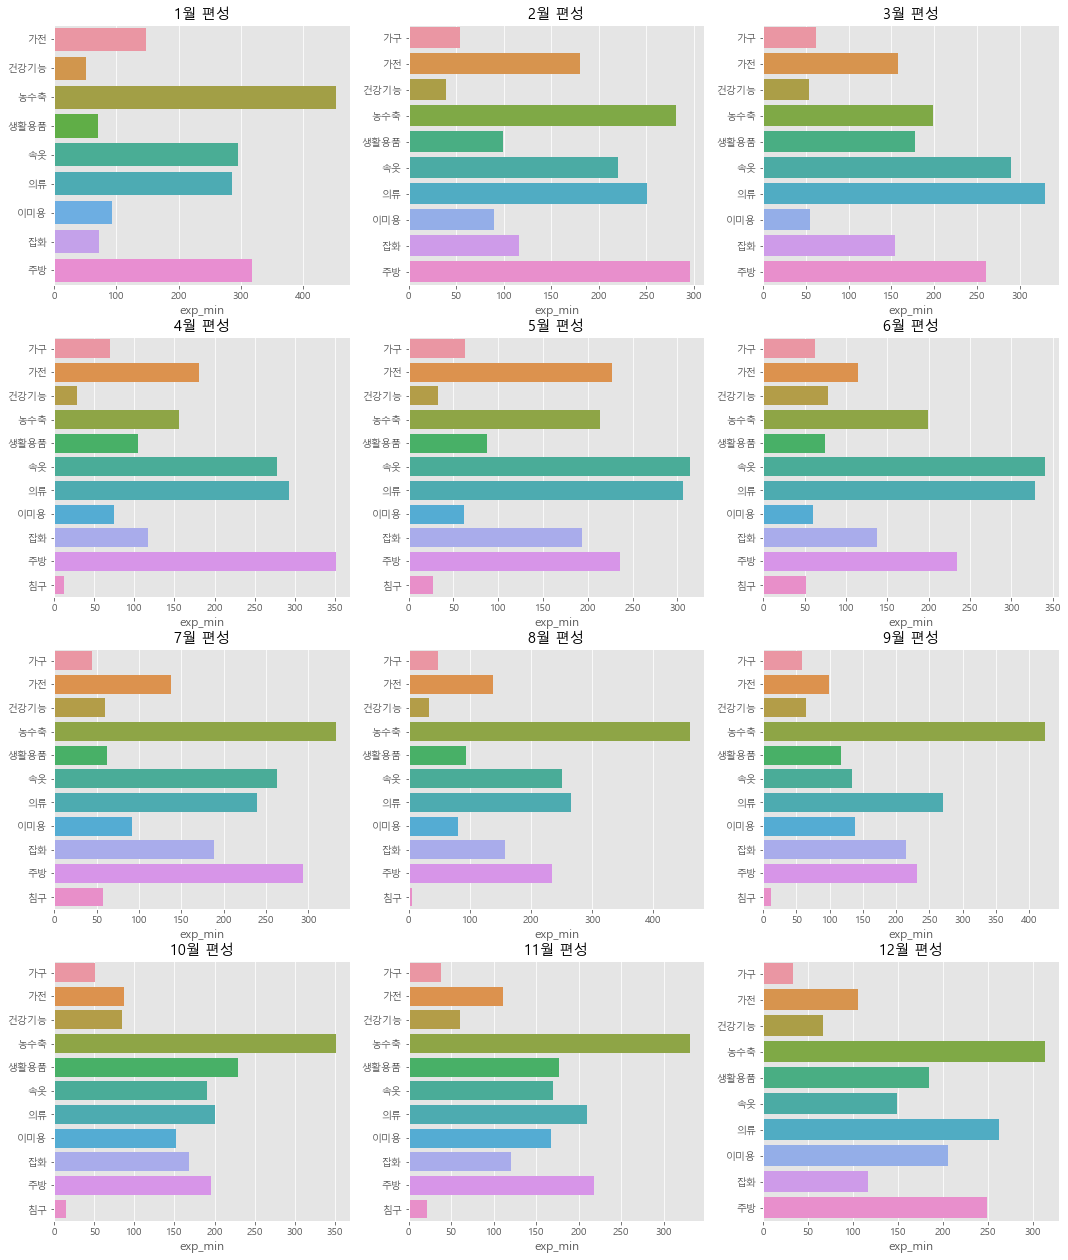

In [ ]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9), (ax10,ax11,ax12)) = plt.subplots(nrows=4, ncols=3)
figure.set_size_inches(18,22)

sns.barplot(data = january_data, x=january_data.groupby('p_group').count()['exp_min'], y=np.unique(january_data['p_group']), ax=ax1)
sns.barplot(data = february_data, x=february_data.groupby('p_group').count()['exp_min'], y=np.unique(february_data['p_group']), ax=ax2)
sns.barplot(data = march_data, x=march_data.groupby('p_group').count()['exp_min'], y=np.unique(march_data['p_group']), ax=ax3)

sns.barplot(data = april_data, x=april_data.groupby('p_group').count()['exp_min'], y=np.unique(april_data['p_group']), ax=ax4)
sns.barplot(data = may_data, x=may_data.groupby('p_group').count()['exp_min'], y=np.unique(may_data['p_group']), ax=ax5)
sns.barplot(data = june_data, x=june_data.groupby('p_group').count()['exp_min'], y=np.unique(june_data['p_group']), ax=ax6)

sns.barplot(data = july_data, x=july_data.groupby('p_group').count()['exp_min'], y=np.unique(july_data['p_group']), ax=ax7)
sns.barplot(data = august_data, x=august_data.groupby('p_group').count()['exp_min'], y=np.unique(august_data['p_group']), ax=ax8)
sns.barplot(data = september_data, x=september_data.groupby('p_group').count()['exp_min'], y=np.unique(september_data['p_group']), ax=ax9)

sns.barplot(data = october_data, x=october_data.groupby('p_group').count()['exp_min'], y=np.unique(october_data['p_group']), ax=ax10)
sns.barplot(data = november_data, x=november_data.groupby('p_group').count()['exp_min'], y=np.unique(november_data['p_group']), ax=ax11)
sns.barplot(data = december_data, x=december_data.groupby('p_group').count()['exp_min'], y=np.unique(december_data['p_group']), ax=ax12)

ax1.set(title="1월 편성")
ax2.set(title="2월 편성")
ax3.set(title="3월 편성")
ax4.set(title="4월 편성")
ax5.set(title="5월 편성")
ax6.set(title="6월 편성")
ax7.set(title="7월 편성")
ax8.set(title="8월 편성")
ax9.set(title="9월 편성")
ax10.set(title="10월 편성")
ax11.set(title="11월 편성")
ax12.set(title="12월 편성")

In [ ]:
dfefe